<a href="https://colab.research.google.com/github/Camila28Lopez/Laboratorio09_SIS420_IA/blob/main/Laboreatorio9_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os 
import numpy as np
import pandas  as pd
from google.colab import drive
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [25]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
data = np.array(data)
x = data[:,0:5]
y = data[:, 6]
print(x)
print(y)
m = y.size


[[19 1 27.9 0 'yes']
 [18 2 33.77 1 'no']
 [28 2 33.0 3 'no']
 ...
 [18 1 36.85 0 'no']
 [21 1 25.8 0 'no']
 [61 1 29.07 0 'yes']]
[16884.924 1725.5523 4449.462 ... 1629.8335 2007.945 29141.3603]


In [49]:
def CambiarDatos(x):
  for i in range (1338):
    for j in range(x.shape[1]):
      if x[i,j] == 'female':
        x[i,j] = 1
      if x[i,j]== "male":
        x[i,j]= 2
      if x[i,j] == "yes":
        x[i,j] = 3
      if x[i,j] == "no":
        x[i,j] = 4

In [50]:
CambiarDatos(x)
print(x)

[[19 1 27.9 0 3]
 [18 2 33.77 1 4]
 [28 2 33.0 3 4]
 ...
 [18 1 36.85 0 4]
 [21 1 25.8 0 4]
 [61 1 29.07 0 3]]


In [51]:

def normalizarX(x):
  x_normalizada = []
  promedio = np.mean(x,axis=0)
  x = x.astype(float)
  desviacion_estandar = np.std(x,axis=0)
  for i in range(m):
    caracteristicas_x = []
    for j in range(x.shape[1]):
      if desviacion_estandar[j] != 0:
        caracteristicas_x.append((x[i,j]-promedio[j])/desviacion_estandar[j])
      else:
        caracteristicas_x.append(0)
    x_normalizada.append(caracteristicas_x)
  return x_normalizada, promedio, desviacion_estandar

In [52]:
x_norm, mu, sigma = normalizarX(x)

print(x)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(x_norm)

[[19 1 27.9 0 3]
 [18 2 33.77 1 4]
 [28 2 33.0 3 4]
 ...
 [18 1 36.85 0 4]
 [21 1 25.8 0 4]
 [61 1 29.07 0 3]]
Media calculada: [39.20702541106129 1.5052316890881914 30.663396860986538 1.0949177877429
 3.795216741405082]
Desviación estandar calculada: [14.04470904  0.49997263  6.09590764  1.20504217  0.40354315]
[[-1.4387642602644821, -1.0105186966374133, -0.45332000146019613, -0.9086136674186784, -1.9705866331709745], [-1.5099654504939408, 0.9895907946360466, 0.5096210969173183, -0.07876719164653397, 0.5074630991436534], [-0.7979535481993532, 0.9895907946360466, 0.383306847215327, 1.580925759897755, 0.5074630991436534], [-0.44194759705205927, 0.9895907946360466, -1.3055310757483023, -0.9086136674186784, 0.5074630991436534], [-0.513148787281518, 0.9895907946360466, -0.2925564109303897, -0.9086136674186784, 0.5074630991436534], [-0.5843499775109768, -1.0105186966374133, -0.8076560785463, -0.9086136674186784, 0.5074630991436534], [0.4836678759309047, -1.0105186966374133, 0.45548641847360

In [53]:
x_norm = np.array(x_norm)

In [54]:

m = x_norm.shape[0]
x= np.concatenate([np.ones((m, 1)), x_norm], axis=1)

In [55]:
print(x)

[[ 1.         -1.43876426 -1.0105187  -0.45332    -0.90861367 -1.97058663]
 [ 1.         -1.50996545  0.98959079  0.5096211  -0.07876719  0.5074631 ]
 [ 1.         -0.79795355  0.98959079  0.38330685  1.58092576  0.5074631 ]
 ...
 [ 1.         -1.50996545 -1.0105187   1.0148781  -0.90861367  0.5074631 ]
 [ 1.         -1.29636188 -1.0105187  -0.79781341 -0.90861367  0.5074631 ]
 [ 1.          1.55168573 -1.0105187  -0.26138796 -0.90861367 -1.97058663]]


In [56]:
def computeCostMulti(x, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(x, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(x, theta) - y))
    
    return J

In [57]:
def gradientDescentMulti(x, y, theta, alpha, num_iters):
    
    m = y.shape[0] 
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(x, theta) - y).dot(x)
        J_history.append(computeCostMulti(x, y, theta))

    
    return theta, J_history

In [77]:
def hallarTheta():
  theta = np.zeros(x.shape[1])
  n_iteraciones = 1000
  alpha = 0.001
  
  theta, historial_J = gradientDescentMulti(x,y,theta,alpha,n_iteraciones)
  return theta, historial_J

In [78]:
def normalizarXPredecir(x):
  x = np.array(x)
  caracteristicas_x_predecir = []
  for i in range (x.shape[0]):
    if sigma[i] != 0:
      caracteristicas_x_predecir.append((x[i]-mu[i])/sigma[i])
    else:
      caracteristicas_x_predecir.append(0)
  return caracteristicas_x_predecir

In [79]:
theta, historial_j =hallarTheta()
print("las thetas encontradas son: ",theta)
print("el menor costo que se pudo determinar fue de : ",historial_j[-1])

las thetas encontradas son:  [8390.948713470085 2280.726305674536 235.28482065402534 1396.3584981242573
 450.9261938533482 -6036.764377043821]
el menor costo que se pudo determinar fue de :  37651036.78836642


In [80]:
def predecir(x):
  x = np.array(x)
  x = np.array(x).astype(float)
  x = normalizarXPredecir(x)
  x = np.array(x)
  x = np.concatenate(([1],x),axis=0)
  y_predecir = np.dot(x,theta)
  print("La y predicha para nuestras x es: ",y_predecir)

In [81]:
predecir([19,1,27,3,4])



La y predicha para nuestras x es:  1682.0515332937434


Text(0, 0.5, 'Costo J')

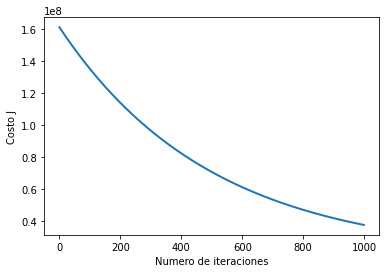

In [82]:
pyplot.plot(np.arange(len(historial_j)), historial_j, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')